# Week 6 : Artificial neural network in PyTorch
```
- Machine Learning, Innopolis University (Fall semester 2023)
- Professor: Adil Khan
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>

In this lab, you will practice simple deep learning model in Pytorch.
```
Lab Plan
1. Theoretical issues with ANNs
2. Deep learning frameworks
3. Introduction to Pytorch : Linear Regression with Pytorch
3. Simple ANN model for classification
4. Training ANNs
```

<hr>


## 1. Theoretical issues
Ordinary fully connected neural nets consists of Dense layers, activations, and output layer.

1. What's the difference between deep learning and normal machine learning?
2. How does a neural network with no hidden layers and one output neuron compare to a logistic/linear regression?
3. Can the perceptron find a non-linear decision boundary?
4. In multi-hidden layers network, what's the need of non-linear activation function?
5. Is random weight assignment better than assigning same weights to the units in the hidden layer.
---

## 2. Deep learning framework : PyTorch

Getting started with Pytorch

## 2.1 Linear Regression with Numpy

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Data Generation
def generate_data(size = 100):
    x = np.random.rand(size, 1)
    y = 3 + 2.5 * x + .1 * np.random.randn(size, 1)

    # Shuffles the indices
    idx = np.arange(size)
    np.random.shuffle(idx)

    # split to train and validation 80:20
    split = int(size * 0.8)
    train_idx = idx[:split]
    val_idx = idx[split:]

    # Generate train and validation sets
    x_train, y_train = x[train_idx], y[train_idx]
    x_val, y_val = x[val_idx], y[val_idx]

    return x_train, y_train, x_val, y_val

## Generate Dataset

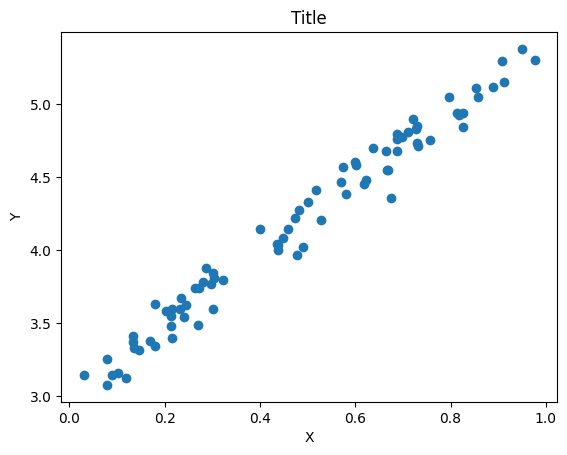

In [ ]:
x_train, y_train, x_val, y_val = generate_data()
plt.scatter(x_train, y_train)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Title")
plt.show()

## Gradient Descent algorithm

Gradient descent consist of 3 basic steps :

1. **Compute the Loss**

$$ \hat{y} = a + bx + \epsilon $$

$$ \text{MSE} = \frac{1}{N} \sum_{i} (y_i - \hat{y}_i)^2 $$

$$ \text{MSE} = \frac{1}{N} \sum_{i} (y_i - a - bx_i)^2 $$

2. **Compute the Gradients** : A gradient is a partial derivative. Using the chain rule the final expression came to be :

$$\frac{\partial \text{MSE}}{\partial a} = \frac{\partial \text{MSE}}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial a} = -2 * \frac{1}{N} \sum_{i} (y_i - \hat{y}_i)$$

$$\frac{\partial \text{MSE}}{\partial b} = \frac{\partial \text{MSE}}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial b} = -2 * \frac{1}{N} \sum_{i} x_i(y_i - \hat{y}_i)$$

3. **Update the Parameters**

$$a = a - \alpha \frac{\partial \text{MSE}}{\partial a}$$

$$b = b - \alpha \frac{\partial \text{MSE}}{\partial b}$$

4. Repeat step 1 to 3 till convergence is reached

## Linear Regression model training

In [ ]:
# Initializes parameters "a" and "b" randomly

a = np.random.randn(1)
b = np.random.randn(1)

print(f"Initial values of [a, b] : [{a[0]}, {b[0]}]")

learning_rate = 1e-1 #learning rate
n_epochs = 1000

for epoch in range(n_epochs):
    # Step 1: Computes y hat
    yhat = a * x_train + b

    # Compute error and Loss using MSE
    error = yhat - y_train
    loss = np.mean(error ** 2)

    # Step 2: Compute gradients for both "a" and "b" parameters (partial derivatives)
    a_grad = np.mean(2 * error)
    b_grad = np.mean(2 * error * x_train)

    # Step 3: Update parameters using gradients and the learning rate
    a = a - learning_rate * a_grad
    b = b - learning_rate * b_grad

print(f"Final values of [a, b] : [{a[0]}, {b[0]}]")

Initial values of [a, b] : [-0.5421081436864059, -0.8942197513091173]
Final values of [a, b] : [-75.05376550363243, 45.27431657560455]


## Pytorch basics

### Tensors

* How to create a Tensor
* Operations on tensors
* Data types for Tensors### Create a Tensor

Create tensors from Numpy then see what operations can be applied.
**Note:** By default a tensor resides in cpu but can be sent to the GPU for fatser computations

In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

x_train_tensor = torch.from_numpy(x_train).to(device)
y_train_tensor = torch.from_numpy(y_train).to(device)

# Here we can see the difference - notice that .type() is more useful
# since it tells WHERE the tensor device

print(type(x_train), type(x_train_tensor), x_train_tensor.type())

<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.cuda.DoubleTensor


## Linear Regression (Numpy -> PyTorch)

In [ ]:
a = torch.randn(1, device=device, requires_grad=True)
b = torch.randn(1, device=device, requires_grad=True)

print(f"Initial values of [a, b] : [{a[0]}, {b[0]}]")

x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

learning_rate = 0.01

for epoch in range(100):

  # Forward pass
    yhat = a * x_train_tensor + b

    # Calculate the mean squared error
    error = yhat - y_train_tensor
    loss = (error ** 2).mean()

    # Backpropagation and gradient computation
    loss.backward()  # Compute gradients

    # Gradient descent to update parameters a and b
    with torch.no_grad():  # Ensure that we don't track these operations for autograd
        a -= learning_rate * a.grad
        b -= learning_rate * b.grad

    # Zero the gradients for the next iteration
    a.grad.zero_()
    b.grad.zero_()

print(f"Final values of [a, b] : [{a[0]}, {b[0]}]")

Initial values of [a, b] : [-0.4212314784526825, -0.2218204140663147]
Final values of [a, b] : [1.412867784500122, 3.1515443325042725]


## Linear Regression PyTorch

In [ ]:
from torch import nn
import torch.optim as optim # for optimizer
from torch.utils.tensorboard import SummaryWriter #for Tensorboard

class LinearRegression(nn.Module):
  def __init__(self,input_dim=1,output_dim=1):
    super(LinearRegression, self).__init__()
    self.layer1 = nn.Linear(input_dim, output_dim)
  def forward(self, x):
    x = self.layer1(x)
    return x

### 2.1 Feed Forward Neural Network
An artificial neural network wherein connections between the nodes do not form a cycle.
<!--![alt text](https://upload.wikimedia.org/wikipedia/en/5/54/Feed_forward_neural_net.gif)
![](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/2294px-Artificial_neural_network.svg.png)-->

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Artificial_neural_network.svg/2294px-Artificial_neural_network.svg.png" width="1000"/>
</div>


### Model Design in Pytorch
we have three simple parts that we need to build:
1. Data Loading process.
2. Model building.
3. the training loops.

<strong>Data Loading</strong>

Data Loading in pytorch is very easy and broken into 3 steps:
1. Data Source
2. Data Transformations
3. Data Loader



## 3. Loading data

Pytorch uses data loading utility which is called `DataLoader` that supports:
automatic batching, transformation, single- and multi-process data loading and more..

In [1]:
from torchvision import datasets, transforms
from torch. utils.data import DataLoader

batch_size = 32
test_batch_size = 100

data_transformations = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

mnist_train = datasets.MNIST('./data', train=True, download=True,
                       transform=data_transformations)
mnist_test = datasets.MNIST('./data', train=False,
                            transform=data_transformations)

train_loader = DataLoader(mnist_train,
                          batch_size=batch_size, shuffle=True)
test_loader = DataLoader(mnist_test,
                         batch_size=test_batch_size, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 100546341.81it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 115808502.70it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 38629574.75it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7647743.38it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



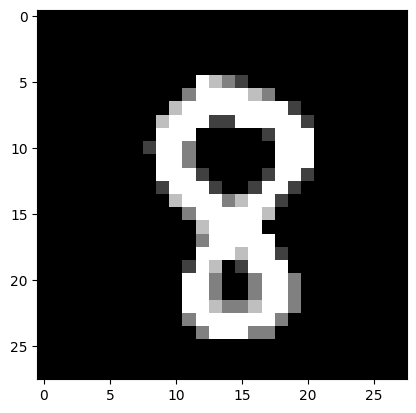

In [4]:
import matplotlib.pyplot as plt
images, labels = next(iter(train_loader))
plt.imshow(images[2].reshape(28,28), cmap="gray")

## 4. Model building
1. Defining components: <br/>
This step is done in the constructor, where you will define the layers that will be used accordingly in the next step.
2. Network flow: <br/>
This step is done in the forward function. Where you will get the input batch as an argument then you will use the defined layers in the previous step to define the flow of the network then you will return the output batch.


Pytorch is a dynamic framework, where you can use primitive python keywords with it.
You can use if and while statements. Also, it can accepts and returns more than one batch.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 250)  # Hidden layer with 250 neurons
        self.fc3 = nn.Linear(250, 100)  # Hidden layer with 100 neurons
        self.fc4 = nn.Linear(100, 10)   # Output layer with 10 neurons for 10 classes

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input
        x = F.relu(self.fc1(x))  # Apply ReLU activation to the first hidden layer
        x = F.relu(self.fc2(x))  # Apply ReLU activation to the second hidden layer
        x = F.relu(self.fc3(x))  # Apply ReLU activation to the third hidden layer
        x = self.fc4(x)          # Output layer without activation function
        return F.log_softmax(x, dim=1)  # Apply log_softmax to get the output probabilities

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)


## 5. Training loops
After that we should define the loops over tha batches and run the training on.

In [ ]:
# Define training params
epochs = 10
lr = 0.01
momentum = 0.5
log_interval = 10

## 5.1 Define the training procedure

In [ ]:
def train( model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = torch.nn.functional.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                       100. * batch_idx / len(train_loader), loss.item()))

## 5.2 Define the evaluation procedure

In [ ]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            # Move the data and target to the device
            data, target = data.to(device), target.to(device)

            # Forward pass to get the output
            output = model(data)

            # Compute the loss
            test_loss += torch.nn.functional.nll_loss(output, target, reduction='sum').item()  # sum up batch loss

            # Get the index of the max log-probability (predicted class)
            pred = output.argmax(dim=1, keepdim=True)

            # Check how many predictions are correct
            correct += pred.eq(target.view_as(pred)).sum().item()

    # Calculate the average test loss
    test_loss /= len(test_loader.dataset)

    # Print the test results
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))


## 5.3 Training Model

In [ ]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)


for epoch in range(1, epochs + 1):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.301807
Train Epoch: 1 [320/60000 (1%)]	Loss: 2.301803
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.280732
Train Epoch: 1 [960/60000 (2%)]	Loss: 2.257506
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.217860
Train Epoch: 1 [1600/60000 (3%)]	Loss: 2.185873
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.146481
Train Epoch: 1 [2240/60000 (4%)]	Loss: 2.191840
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.144187
Train Epoch: 1 [2880/60000 (5%)]	Loss: 2.096740
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.016527
Train Epoch: 1 [3520/60000 (6%)]	Loss: 2.016898
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.771999
Train Epoch: 1 [4160/60000 (7%)]	Loss: 1.686974
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.475987
Train Epoch: 1 [4800/60000 (8%)]	Loss: 1.484921
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.395447
Train Epoch: 1 [5440/60000 (9%)]	Loss: 1.236282
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.896691
Train Epoch: 1 [6080/60000 (10%)]	Loss: 0.970463
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.82

## 6. Save model

In [ ]:
torch.save(model.state_dict(), 'linear_regression_model.pth')

## <center>Self-practice <center>

Using Dataset from assignment 1
1. Define, train and evaluate an ANN for Regression and Classification
1. Plot the loss and accuracy of the model for each training iteration
    
ANN should be implemented in PyTorch